# Trends in Global Food Consumption <br> Compared with Mental Health & Technology

<a id='intro'></a>
## Introduction

> **Research has shown that the increase of food consumption is linked with coping mechanisms for stress or other mental health issues. Moreover, over food consumption (obesity) has risen over the years with the increase in technology in daily life, notably the internet. This quantitative comparison study attempts to see if these aforementioned patterns can be seen within two unique measures in the sphere of 'mental health' and 'technology use.'** <br><br> _See <a href="#appendix">appendix</a> for links to some research citing the correlation between the aforementioned measures._

The project focuses collectively on a global analysis view looking at individual countries and annual data as individual data points. The following are the measures used in this project from the acquired datasets that are discussed in the <a href="#source">data source</a> section. 

Under the sphere of **mental health**, global data was acquired showing figures in number of dealths due to suicide per year. Death infected onto one's self indicates severe mental health struggles. Although food consumption broadly has been related to mental health, part of this project will look to see if suicide data matches with the correlation that has been reported previously in the scientific literature.  

For **technology**, the rise of the use and spread of the internet has impacted modern culture and economies across the world. A dataset that contains the percentage of people that use the internet within that country will serve as a measure of the influence of technology within this project. 

The **food consumption** data set will be under the title "foodsupply" and represent the number of kilocalories (or Calories) one person consumes on average per day in that country. Again, data is segmented on a yearly basis. It may be helpful to note that a normal range is 1500-3000 kcal per day and one banana contains approximately 100 kcal.

### Contents:
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#source">Data Source</a></li>
    <li><a href="#wrangle">Data Wrangling & Cleaning</a></li>
    <li><a href="#explore">Exploratory Data Analysis</a></li>
        <ul>
        <li><a href="#Q1">Q1. How has the consumption of food per person (per day) changed over time throughout the world?</a></li>
        <li><a href="#Q2">Q2. Is consumption of food per person related by region of the world?</a></li>
        <li><a href="#Q3">Q3. Is there a correlation between the food consumption per person in a country with that country's rate of suicide?</a></li>
        <li><a href="#Q4">Q4. Is there a correlation between the food consumption per person in a country with the number of internet users in that country?</a></li>
        </ul>
    <li><a href="#summary">Summary & Conclusions</a></li>
    <li><a href="#appendix">Appendix</a></li>
</ul>

<a id='source'></a>
## Data Sources

All the data was retrived through [Gapminder](http://www.gapminder.org). Gapminder is an independent Swedish foundation with no political, religious or economic affiliations. The data source contains datasets for various indicators covering topics across industries and sectors.

There were 4 datasets included in this analysis:
1. **Population, total**
2. Health > Nutrition > **Food Supply**
3. Health > Mental Health> **Suicide, total deaths**
4. More Data > wdi > Infrastructure > Communications > **Individuals using the Internet (% of population)**

The datasets were accessed and downloaded on January 4, 2021. 


<a id='wrangle'></a>
## Data Wrangling & Cleaning

Before starting to analyze the data, the quality of the datasets downloaded from the Gapminder database is evaluated and then cleaned appropriately. First, the various libaries and packages are imported that will be used at different stages of this project. 

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from functools import reduce

# https://github.com/konstantinstadler/country_converter
import country_converter as coco # connects country code with its continent 

%matplotlib inline

#### Wrangling *population* and *foodsupply* raw datasets
As hinted by the questions stated in the Content section, knowing the population numbers will be helpful to normalize for comparison sake among the different datasets and figures. Therefore this dataset is also included in the anaylsis. 

Since the purpose of this quantiative correlation study wants to explore relationship (if any) between the different data sets, it is important that there are consistent year ranges. First, the world population dataset is explored to understand its general properties.

In [205]:
# read population csv
df_population = pd.read_csv('population_total.csv')

# view structure of dataset
df_population.head(3)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,76600000,76400000,76300000,76100000,76000000,75800000,75600000,75400000,75200000,74900000
1,Albania,400000,402000,404000,405000,407000,409000,411000,413000,414000,...,1330000,1300000,1270000,1250000,1220000,1190000,1170000,1140000,1110000,1090000
2,Algeria,2500000,2510000,2520000,2530000,2540000,2550000,2560000,2560000,2570000,...,70400000,70500000,70500000,70600000,70700000,70700000,70700000,70700000,70700000,70700000


In [206]:
# understand the shape of population dataset
df_population.shape

(195, 302)

The population dataset may have around 195 countries and 301 years of data by the information gathered above. The dataset on the consumption of food per day per person is primary to answering the questions drafted for this project. This is the next dataset explored after global population numbers.

In [207]:
# read food consumption csv
df_foodsupply = pd.read_csv('food_supply_kilocalories_per_person_and_day.csv')

# view structure of dataset
df_foodsupply.head(3)

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,3000.0,2920.0,2700.0,2950.0,2960.0,2740.0,2970.0,2920.0,2940.0,...,1970.0,1950.0,1970,2050,2040,2080,2100,2110,2100,2090
1,Albania,2220.0,2240.0,2160.0,2270.0,2250.0,2250.0,2260.0,2340.0,2400.0,...,2790.0,2870.0,2860,2860,2950,2990,3080,3130,3180,3190
2,Algeria,1620.0,1570.0,1530.0,1540.0,1590.0,1570.0,1650.0,1710.0,1710.0,...,2990.0,2960.0,3050,3040,3050,3110,3140,3220,3270,3300


In [208]:
# understand the shape of the foodsupply dataset
df_foodsupply.shape

(168, 54)

The population dataset year range is much broader than the foodsupply one. (Population has 301 years of data while Food Supply has 53.) It is important that both datasets have the same year ranges since comparisons will be made. Therefore the years not match by the population dataset witin the foodsupply one will be removed. (Assuming the population year range is inclusive within the foodsupply year range - which appears to be by inspection.)

When exploring the dataset it is noted that there is data on future years. This raises a flag on the integrity of the data. Since the project is limited to Gapminder data - these columns will be deleted so the last column is 2013, similar to the foodsupply dataset and assume past years have accurate data.

In [209]:
# remove years in population 
df_population.drop(df_population.loc[:,'1800':'1960'].columns, axis=1, inplace=True)
df_population.drop(df_population.loc[:,'2014':'2100'].columns, axis=1, inplace=True)

# confirm columns in both datasets match
(df_population.columns == df_foodsupply.columns).all()

True

#### Wrangling *suicide* and *internet* raw datasets
The number of suicide deaths in each country as a measure of mental health and the percentage of internet users per country as a measure of technology in daily life, will be datasets used for analysis later on in conjunction with the population and food supply datasets. Properties of these tables are explored next in similar fashion. 

In [210]:
# read suicide csv
df_suicide = pd.read_csv('suicide_total_deaths.csv')

# view structure of dataset
df_suicide.head(3)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,703.0,754.0,820.0,894.0,977.0,1050.0,1100.0,1130.0,1170.0,...,1680.0,1710.0,1750.0,1760.0,1810.0,1870.0,1990.0,2080.0,2170.0,2250.0
1,Albania,127.0,130.0,131.0,135.0,136.0,142.0,150.0,162.0,170.0,...,204.0,205.0,201.0,195.0,191.0,188.0,186.0,184.0,183.0,181.0
2,Algeria,806.0,822.0,843.0,866.0,888.0,912.0,941.0,983.0,1020.0,...,1240.0,1250.0,1270.0,1290.0,1310.0,1340.0,1370.0,1410.0,1420.0,1440.0


In [211]:
# read internet csv
df_internet = pd.read_csv('it_net_user_zs.csv')

# view structure of dataset
df_internet.head(3)

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,5.0,5.45,5.9,7.0,8.26,11.2,13.5,13.5,13.5
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.0,49.0,54.70,57.2,60.1,63.30,66.4,71.8,71.8,69.6
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.5,14.9,18.20,22.5,29.5,38.20,42.9,47.7,59.6,59.6


The year ranges for population and foodsupply were limited to 1961 - 2013.  Ideally, these other two measures will need comparable year ranges. Since foodsupply will be used to compare to each of these, this is the dataset that will set the year range for much of the analysis. (This can be done since the other data sets are inclusive of the year range.)  Only the years of 1990-2013 will be displayed for foodsupply, internet users, and suicide numbers. 

Since the <a href="#Q1">first question</a> of the analysis only looks at population and food supply a seperate merged dataframe will be created that gives an expanded set of years. Allowing more data will help discover trends and give opportunity for more insight.

At first glance above there might be several null values with the early years of Internet user table. The null values within the chart will be inspected more closely.    

In [212]:
# exploring null values for years in internet users
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  194 non-null    object 
 1   1960     7 non-null      float64
 2   1961     0 non-null      float64
 3   1962     0 non-null      float64
 4   1963     0 non-null      float64
 5   1964     0 non-null      float64
 6   1965     7 non-null      float64
 7   1966     0 non-null      float64
 8   1967     0 non-null      float64
 9   1968     0 non-null      float64
 10  1969     0 non-null      float64
 11  1970     7 non-null      float64
 12  1971     0 non-null      float64
 13  1972     0 non-null      float64
 14  1973     0 non-null      float64
 15  1974     0 non-null      float64
 16  1975     7 non-null      float64
 17  1976     7 non-null      float64
 18  1977     7 non-null      float64
 19  1978     7 non-null      float64
 20  1979     7 non-null      float64
 21  1980     7 non-n

There are several null values for 1960-1989. Keeping the range of 1990 - 2013 which matches with the numbers of suicides will work well for analysis. Both datasets will have years dropped outside of the range of 1990-2013. 

In [213]:
# remove unneeded year columns in internet dataset
df_internet.drop(df_internet.loc[:,'1960':'1989'].columns, axis=1, inplace=True)
df_internet.drop(df_internet.loc[:,'2014':'2019'].columns, axis=1, inplace=True)

# remove unneeded year columns in suicide dataset
df_suicide.drop(df_suicide.loc[:,'2014':'2016'].columns, axis=1, inplace=True)

# confirm columns in both datasets match
(df_internet.columns == df_suicide.columns).all()

True

#### Investigating countries within datasets
It is important that all the datasets show the same countries. Since there will be correlations between values - it is important values are present for each country and year represented. In addition, in general, it is important to make sure a particular dataset does not receive any bias or influence with an addition or deletion of certain countries. 

The following function provides details on what specific countries need to deleted from two datasets (dataframes) in order to ensure they match. It is important to know how many and what countries need to be deleted in the event something appears where removal is not the best option. The function will allow this process to happen quickly for any couple of dataframes being examined. 

In [214]:
def country_diff_details(df1, df2):
    list1 = df1.country.unique()
    list2 = df2.country.unique()
    
    # countries to be deleted from df1
    list3 = list(set(list1)-set(list2))
    
    # countries to be deleted from df2
    list4 = list(set(list2)-set(list1))
    
    # both datasets differ by these countries
    list5 = list3 + list4
    numb_list5 = len(list5)
    
    print("There will be ", numb_list5 ," countries dropped between the datasets.\n")
    print("Those countries will include:", list5)
    
    return

In [215]:
country_diff_details(df_population, df_foodsupply)

There will be  27  countries dropped between the datasets.

Those countries will include: ['Comoros', 'Liechtenstein', 'Holy See', 'Seychelles', 'Eritrea', 'Equatorial Guinea', 'Palestine', 'Bhutan', 'San Marino', 'Congo, Dem. Rep.', 'Marshall Islands', 'Singapore', 'Syria', 'Somalia', 'Tuvalu', 'Qatar', 'Libya', 'Bahrain', 'Andorra', 'Palau', 'Nauru', 'Burundi', 'Monaco', 'Papua New Guinea', 'South Sudan', 'Micronesia, Fed. Sts.', 'Tonga']


The function below goes ahead and removes these countries. The above 27 countries will be deleted. They appear to be smaller nations and not focused very heavy on one region. Additionally, this will drop about 15% of data. This is certainly not ideal. But for the purposes of this project, they will be eliminated from the analysis. 

In [216]:
def country_differences(df1, df2):
    """
    Args:
        (dataframe) df1: dataframe 1 designed by user
        (dataframe) df2: dataframe 2 designed by user
    Return:
        (dataframe) df1: dataframe 1 with removed rows (as necessary)
        (dataframe) df2: dataframe 2 with removed rows (as necessary)

    Finds the countries not contained in both datasets and drops those countries from each so they both match.
    """
    list1 = df1.country.unique()
    list2 = df2.country.unique()
    
    # countries to be deleted from df1
    list3 = list(set(list1)-set(list2))
    
    # countries to be deleted from df2
    list4 = list(set(list2)-set(list1))
        
    df1new = df1[~df1['country'].isin(list3)]
    df2new = df2[~df2['country'].isin(list4)]

    return df1new, df2new

In [217]:
df_new_population, df_new_foodsupply = country_differences(df_population, df_foodsupply)

In [218]:
# confirm countries match 
country_diff_details(df_new_population, df_new_foodsupply)

There will be  0  countries dropped between the datasets.

Those countries will include: []


In [219]:
# showing the final number of countries in dataset
df_new_population.shape

(168, 54)

Although the columns of years allow good opportunity for comparison, creating a 'year' column with multiple listings for each country will lend better to visualizations and aggregations later in the project. Therefore the [melt panda](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) function is used so that each year will be an individual row and sorted by country and year. 

A function is written below that will be able to be applied to other dataframes in the future. The function will take two or more dataframes, individually melt it and then additional code will merge together on country and year. After merging, it sorts by year and country. This will be used to faciliate the process for future dataframes as well since all data gathered from Gapminder share similar formats.

In [220]:
def df_melt(dfs, column_name):
    """
    Uses panda melt arrange Gapminder data in better format; sorts by year and country. 
    
    Args:
        (dataframe) dfs: list of dataframes
        (str) volumn_name: value name for column
    
    Returns:
        (dataframe) df_melt : dataframe containing the merged df formatted for analysis
    """
    
    # list created
    df_new = []
    
    # loop over list in df
    for i, x in enumerate(dfs):
        df_melt = pd.melt(dfs[i], id_vars = ["country"], var_name = 'year', value_name = column_name[i])
        df_melt.sort_values(["country", "year"], inplace = True)
    
        # append to created list
        df_new.append(df_melt)
    
    return df_new

In [221]:
dataframes = [df_new_population, df_new_foodsupply]
column_names = ["population", "foodsupply"]

df_popfood = df_melt(dataframes, column_names)
df_newfood = df_popfood[1]
df_newfood.head()

,country,year,foodsupply
0,Afghanistan,1961,3000.0
168,Afghanistan,1962,2920.0
336,Afghanistan,1963,2700.0
504,Afghanistan,1964,2950.0
672,Afghanistan,1965,2960.0


In [222]:
df_newpop = df_popfood[0]
df_newpop.head()

,country,year,population
0,Afghanistan,1961,9170000
168,Afghanistan,1962,9350000
336,Afghanistan,1963,9540000
504,Afghanistan,1964,9740000
672,Afghanistan,1965,9960000


In [223]:
# reduces the melted dataframes into one
df_popfood_final = reduce(lambda left,right: pd.merge(left,right, on=["country", "year"], how = 'left'), df_popfood)

In [224]:
# confirm
df_popfood_final.head()

,country,year,population,foodsupply
0,Afghanistan,1961,9170000,3000.0
1,Afghanistan,1962,9350000,2920.0
2,Afghanistan,1963,9540000,2700.0
3,Afghanistan,1964,9740000,2950.0
4,Afghanistan,1965,9960000,2960.0


Now null values will be examined.

In [225]:
# take care of null values
df_popfood_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8904 entries, 0 to 8903
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     8904 non-null   object 
 1   year        8904 non-null   object 
 2   population  8904 non-null   int64  
 3   foodsupply  8022 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 347.8+ KB


The function below documents the number of missing values per country. This will give information as to if certain countries are missing the large quanties of data. 

In [226]:
def missing_bycountry(df, column):
    """
    Args:
        (dataframe) df = dataframe
        (str) column = column
    Return:
        prints country list (str) with number of missing values (int)
    """
    missing = []
    for x in list((df["country"]).unique()):
        missing_n = sum(df[df["country"] == x][column].isnull())
        
        if missing_n > 0:
            missing.append(x)
            print (x, "-", missing_n)
    
    return missing    

In [227]:
missing_bycountry(df_popfood[1], "foodsupply");

Armenia - 31
Azerbaijan - 31
Belarus - 31
Belgium - 39
Bosnia and Herzegovina - 31
Croatia - 31
Czech Republic - 32
Estonia - 31
Ethiopia - 32
Georgia - 31
Kazakhstan - 31
Kyrgyz Republic - 31
Latvia - 31
Lithuania - 31
Luxembourg - 39
Moldova - 31
Montenegro - 45
North Macedonia - 31
Oman - 29
Russia - 31
Serbia - 45
Slovak Republic - 32
Slovenia - 31
Tajikistan - 31
Turkmenistan - 31
Ukraine - 31
Uzbekistan - 31


There are 27 countries that have missing data between the years of 1990 - 2013. (This is a different 27 country list than before.) 18 countries have 31 null values, which is the minimum except for Oman with 29. Leaving 7 countries with more missing years. These 7 countries will be deleted from the dataset. 

In [228]:
# drop countries determined above
country_drop = ["Belgium", "Czech Republic", "Ethiopia", "Luxembourg", "Montenegro", "Serbia", "Slovak Republic"]
df_popfood_final_v2 = df_popfood_final[~df_popfood_final['country'].isin(country_drop)]

# check if countries are dropped by using Serbia as an example
df_popfood_final_v2.query("country == 'Serbia'")

,country,year,population,foodsupply


Russia will be used to roughly survey as part of the 18-country group aforementioned to see if there is a possbility of where those 18 null values are. Since several countries contain the same number of null values this could point to a pattern. 

In [229]:
df_popfood_final.query("country == 'Russia'")

,country,year,population,foodsupply
6572,Russia,1961,121000000,NaN
6573,Russia,1962,123000000,NaN
6574,Russia,1963,124000000,NaN
6575,Russia,1964,125000000,NaN
6576,Russia,1965,127000000,NaN
6577,Russia,1966,127000000,NaN
6578,Russia,1967,128000000,NaN
6579,Russia,1968,129000000,NaN
6580,Russia,1969,129000000,NaN
6581,Russia,1970,130000000,NaN


Two data points will be estimated for those missing data from 1990 and 1991. This will allow the countries to be included for later analysis when the suicide figures and internet users are considered. A copy of the dataframe is taken now however to save a dataframe for analysis allowing more nations to be considered when comparing with population. 

However the countries that will require fill in data will also need to be eliminated from this dataset for analysis. 

In [230]:
# copy dataframe for food consumption and population analysis
df_popfood_v3 = df_popfood_final_v2.copy()

#drop the countries that will require fill in data
countries_fillin_data = ["Armenia", "Azerbaijan", "Belarus", "Bosnia and Herzegovina", "Croatia", "Estonia", "Georgia", "Kazakhstan", "Kyrgyz Republic", "Latvia", "Lithuania", "Moldova", "North Macedonia", "Russia", "Slovenia", "Tajikistan", "Turkmenistan", "Ukraine", "Uzbekistan"]
df_popfood_v4 = df_popfood_v3[~df_popfood_v3['country'].isin(countries_fillin_data)]

# confirm countries have been dropped with Croatia as example
df_popfood_v4.query("country == 'Croatia'")

,country,year,population,foodsupply


In [231]:
# drop Oman 
finaldrop = ["Oman"]
df_popfood_v5 = df_popfood_v4[~df_popfood_v4['country'].isin(finaldrop)]

# confirm dropped
df_popfood_v5.query("country =='Oman'")

,country,year,population,foodsupply


In [232]:
df_popfood_v5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7473 entries, 0 to 8903
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     7473 non-null   object 
 1   year        7473 non-null   object 
 2   population  7473 non-null   int64  
 3   foodsupply  7473 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 291.9+ KB


In [233]:
df_popfood_v5.isnull().sum()

country       0
year          0
population    0
foodsupply    0
dtype: int64

The information provided above indicates that columns show appropriate data type for analysis. In addition, there are 7473 entries with no null values.   

In [234]:
# save clean data for population and food supply analysis
df_popfood_v5.to_csv('df_popfood_clean.csv', index=False)

#### Cleaning datasets for further analysis

The cleaned dataset above will be further refined by:
- filling in null values for the countries identified previously. 
- dropping columns so only 1990-2013 range are included.
- join the 'suicide.csv' dataset
- join the 'internet.csv' dataset
- investigate possible null values

In [235]:
# load dataset
df_popfood_final_v2.head()

,country,year,population,foodsupply
0,Afghanistan,1961,9170000,3000.0
1,Afghanistan,1962,9350000,2920.0
2,Afghanistan,1963,9540000,2700.0
3,Afghanistan,1964,9740000,2950.0
4,Afghanistan,1965,9960000,2960.0


Focus on continuing to clean data for later analysis

In [236]:
def null_values(df, countrylist_null):
    """
    Arg:
        (dataframe) df - 
        (list) countrylist_null - list of countries that will have data estimated 
        
    Return:
        (dataframe) df - 
        
    Estimates the data for 1990 and 1991 based on data gathered from 1992-1994
    """
    
    df = df.sort_values(by=['country','year']).copy()
    mask_92 = (df["country"].isin(countrylist_null)) & (df["year"] == "1992")
    value_92 = df[mask_92]["foodsupply"].values
    mask_93 = (df["country"].isin(countrylist_null)) & (df["year"] == "1993")
    value_93 = df[mask_93]["foodsupply"].values
    mask_94 = (df["country"].isin(countrylist_null)) & (df["year"] == "1994")
    value_94 = df[mask_94]["foodsupply"].values

    rate_92_93 = (value_93 - value_92) / value_92
    rate_93_94 = (value_94 - value_93) / value_93
    rate = (sum(rate_92_93, rate_93_94))/2

    value_91 = value_92 + (-1 * rate_92_93 * value_92)
    value_90 = value_91 + (-1 * rate_93_94 * value_91)

    mask_90 = (df["country"].isin(countrylist_null)) & (df["year"] == "1990")
    df.loc[mask_90,'foodsupply'] = value_90
    mask_91 = (df["country"].isin(countrylist_null)) & (df["year"] == "1991")
    df.loc[mask_91,'foodsupply'] = value_91

    return df

In [237]:
countries_fillin_data = ["Armenia", "Azerbaijan", "Belarus", "Bosnia and Herzegovina", "Croatia", "Estonia", "Georgia", "Kazakhstan", "Kyrgyz Republic", "Latvia", "Lithuania", "Moldova", "North Macedonia", "Russia", "Slovenia", "Tajikistan", "Turkmenistan", "Ukraine", "Uzbekistan"]

# used to fill in data
df_popfood_est = null_values(df_popfood_final_v2, countries_fillin_data)

# confirm success
df_test1 = df_popfood_est
df_mask_90_94 = ((df_test1["country"].isin(countries_fillin_data)) & (df_test1["year"].isin(["1990","1991","1992","1993","1994"])))
df_test1[df_mask_90_94].head(10)

,country,year,population,foodsupply
347,Armenia,1990,3540000,2173.904762
348,Armenia,1991,3510000,2260.000000
349,Armenia,1992,3440000,2180.000000
350,Armenia,1993,3360000,2100.000000
351,Armenia,1994,3280000,2180.000000
506,Azerbaijan,1990,7240000,2485.714286
507,Azerbaijan,1991,7360000,2400.000000
508,Azerbaijan,1992,7470000,2320.000000
509,Azerbaijan,1993,7580000,2240.000000
510,Azerbaijan,1994,7680000,2160.000000


In [238]:
# melt suicide and internet dataframe
df_tomelt = [df_suicide, df_internet]
columns_new = ["suicide", "internet"]

df_foodint_temp = df_melt(df_tomelt, columns_new)

# join dataframes
df_foodint = reduce(lambda left,right: pd.merge(left,right, on=["country", "year"], how = 'left'), df_foodint_temp)

df_foodint.head()

,country,year,suicide,internet
0,Afghanistan,1990,703.0,0.0
1,Afghanistan,1991,754.0,0.0
2,Afghanistan,1992,820.0,0.0
3,Afghanistan,1993,894.0,0.0
4,Afghanistan,1994,977.0,0.0


In [239]:
# join with population dataframe
df_join = [df_foodint, df_popfood_est]
df_main = reduce(lambda left,right: pd.merge(left,right, on=['country', 'year'], how = 'left'), df_join)

# confirm merge
df_main.head()

,country,year,suicide,internet,population,foodsupply
0,Afghanistan,1990,703.0,0.0,12400000.0,2310.0
1,Afghanistan,1991,754.0,0.0,13300000.0,2040.0
2,Afghanistan,1992,820.0,0.0,14500000.0,1890.0
3,Afghanistan,1993,894.0,0.0,15800000.0,1910.0
4,Afghanistan,1994,977.0,0.0,17100000.0,1820.0


In [240]:
# confirm year range 
print("min: ", df_main['year'].min(), " max: ", df_main['year'].max())

min:  1990  max:  2013


In [241]:
# check for null values
df_main.isnull().sum()

country         0
year            0
suicide         0
internet      107
population    648
foodsupply    648
dtype: int64

In [242]:
missing_bycountry(df_main, "population");

Andorra - 24
Bahrain - 24
Belgium - 24
Bhutan - 24
Burundi - 24
Comoros - 24
Congo, Dem. Rep. - 24
Czech Republic - 24
Equatorial Guinea - 24
Eritrea - 24
Ethiopia - 24
Libya - 24
Luxembourg - 24
Marshall Islands - 24
Micronesia, Fed. Sts. - 24
Montenegro - 24
Palestine - 24
Papua New Guinea - 24
Qatar - 24
Serbia - 24
Seychelles - 24
Singapore - 24
Slovak Republic - 24
Somalia - 24
South Sudan - 24
Syria - 24
Tonga - 24


The 27 countries listed above are the same 27 countries deleted earlier. These were the countries that did not match up when looking just the population and food supply datasets. These countries will be deleted again, as they appeared from the new dataset previously merged together. 

Also countries earlier dropped will be added to this list: "Belgium", "Czech Republic", "Ethiopia", "Luxembourg", "Montenegro", "Serbia", "Slovak Republic"

In [243]:
# delete countries
country_drop = ["Belgium", "Czech Republic", "Ethiopia", "Luxembourg", "Montenegro", "Serbia", "Slovak Republic", 'Qatar', 'Tuvalu', 'Burundi', 'Bhutan', 'Papua New Guinea', 'Congo, Dem. Rep.', 'Marshall Islands', 'Seychelles', 'Micronesia, Fed. Sts.', 'Singapore', 'Liechtenstein', 'Palestine', 'South Sudan', 'Palau', 'Bahrain', 'Syria', 'Comoros', 'San Marino', 'Monaco', 'Andorra', 'Equatorial Guinea', 'Eritrea', 'Holy See', 'Libya', 'Nauru', 'Tonga', 'Somalia']
df_main2 = df_main[~df_main['country'].isin(country_drop)]

# confirm change
df_main2.isnull().sum()

country        0
year           0
suicide        0
internet      44
population     0
foodsupply     0
dtype: int64

In [244]:
missing_bycountry(df_main2, "internet");

Afghanistan - 5
Bangladesh - 1
Cambodia - 1
Cameroon - 1
Cape Verde - 1
Chad - 1
Guinea-Bissau - 1
Iraq - 5
Kiribati - 2
Kyrgyz Republic - 2
Lao - 2
Liberia - 1
Malawi - 1
Mauritania - 1
Myanmar - 3
North Korea - 1
Samoa - 1
Sao Tome and Principe - 2
Tajikistan - 3
Timor-Leste - 6
Turkmenistan - 3


Perform a quick survey of the those countries with the most null values from the list. 

In [245]:
df_main2.query('country == "Timor-Leste"')

,country,year,suicide,internet,population,foodsupply
4008,Timor-Leste,1990,72.1,0.000,738000.0,1820.0
4009,Timor-Leste,1991,73.9,0.000,760000.0,1930.0
4010,Timor-Leste,1992,75.0,0.000,783000.0,1990.0
4011,Timor-Leste,1993,75.5,0.000,807000.0,2030.0
4012,Timor-Leste,1994,75.4,0.000,828000.0,2010.0
4013,Timor-Leste,1995,74.6,0.000,844000.0,2030.0
4014,Timor-Leste,1996,70.1,NaN,855000.0,1890.0
4015,Timor-Leste,1997,65.3,NaN,862000.0,1920.0
4016,Timor-Leste,1998,61.9,NaN,867000.0,1800.0
4017,Timor-Leste,1999,58.1,NaN,873000.0,1830.0


In [246]:
df_main2.query('country == "Iraq"')

,country,year,suicide,internet,population,foodsupply
1896,Iraq,1990,1020.0,0.000,17400000.0,3250.0
1897,Iraq,1991,1100.0,0.000,17900000.0,2360.0
1898,Iraq,1992,1170.0,0.000,18400000.0,2250.0
1899,Iraq,1993,1250.0,0.000,19000000.0,2260.0
1900,Iraq,1994,1330.0,0.000,19500000.0,2230.0
1901,Iraq,1995,1420.0,0.000,20100000.0,2200.0
1902,Iraq,1996,1490.0,NaN,20800000.0,2180.0
1903,Iraq,1997,1590.0,NaN,21400000.0,2100.0
1904,Iraq,1998,1610.0,NaN,22100000.0,2120.0
1905,Iraq,1999,1650.0,NaN,22800000.0,2150.0


In [247]:
df_main2.query('country == "Afghanistan"')

,country,year,suicide,internet,population,foodsupply
0,Afghanistan,1990,703.0,0.00000,12400000.0,2310.0
1,Afghanistan,1991,754.0,0.00000,13300000.0,2040.0
2,Afghanistan,1992,820.0,0.00000,14500000.0,1890.0
3,Afghanistan,1993,894.0,0.00000,15800000.0,1910.0
4,Afghanistan,1994,977.0,0.00000,17100000.0,1820.0
5,Afghanistan,1995,1050.0,0.00000,18100000.0,1840.0
6,Afghanistan,1996,1100.0,NaN,18900000.0,1840.0
7,Afghanistan,1997,1130.0,NaN,19400000.0,1870.0
8,Afghanistan,1998,1170.0,NaN,19700000.0,1900.0
9,Afghanistan,1999,1200.0,NaN,20200000.0,1850.0


Fill in NaN values with 0

In [248]:
df_main2['internet'].fillna(0, inplace=True)

# confirm all null values have been taken care of 
df_main2.isnull().sum()

/Users/bryandunn/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


country       0
year          0
suicide       0
internet      0
population    0
foodsupply    0
dtype: int64

In [249]:
# verify usable datatype 
df_main2.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3840 entries, 0 to 4487
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     3840 non-null   object 
 1   year        3840 non-null   object 
 2   suicide     3840 non-null   float64
 3   internet    3840 non-null   float64
 4   population  3840 non-null   float64
 5   foodsupply  3840 non-null   float64
dtypes: float64(4), object(2)
memory usage: 210.0+ KB


In [250]:
df_main2['country'].nunique()

160

Information above confirms that there are all columns have an appropriate data type for future analysis. In addition through the cleaning process there are a total of 160 countries that will be included in this project's analysis. This represents 82% of the countries from the start with the raw data.  

The following is the complete list of countries that were removed from analysis due to various reasons:
"Belgium", "Czech Republic", "Ethiopia", "Luxembourg", "Montenegro", "Serbia", "Slovak Republic", 'Qatar', 'Tuvalu', 'Burundi', 'Bhutan', 'Papua New Guinea', 'Congo, Dem. Rep.', 'Marshall Islands', 'Seychelles', 'Micronesia, Fed. Sts.', 'Singapore', 'Liechtenstein', 'Palestine', 'South Sudan', 'Palau', 'Bahrain', 'Syria', 'Comoros', 'San Marino', 'Monaco', 'Andorra', 'Equatorial Guinea', 'Eritrea', 'Holy See', 'Libya', 'Nauru', 'Tonga', 'Somalia'

In [251]:
# save clean data for population and food supply analysis
df_main2.to_csv('df_full_clean.csv', index=False)

<a id='explore'></a>
## Exploratory Data Analysis

<a id='Q1'></a>
### Q1. How has the consumption of food per person (per day) changed over time throughout the world?

In [252]:
df_partial = pd.read_csv('df_popfood_clean.csv')
df_partial.head()

,country,year,population,foodsupply
0,Afghanistan,1961,9170000,3000.0
1,Afghanistan,1962,9350000,2920.0
2,Afghanistan,1963,9540000,2700.0
3,Afghanistan,1964,9740000,2950.0
4,Afghanistan,1965,9960000,2960.0


In [253]:
group_yr = df_partial.groupby(['year']).sum()
group_yr.head()

,population,foodsupply
year,,
1961,2753501000,314420.0
1962,2805011000,317630.0
1963,2860056300,318830.0
1964,2916978800,322760.0
1965,2976954200,325810.0


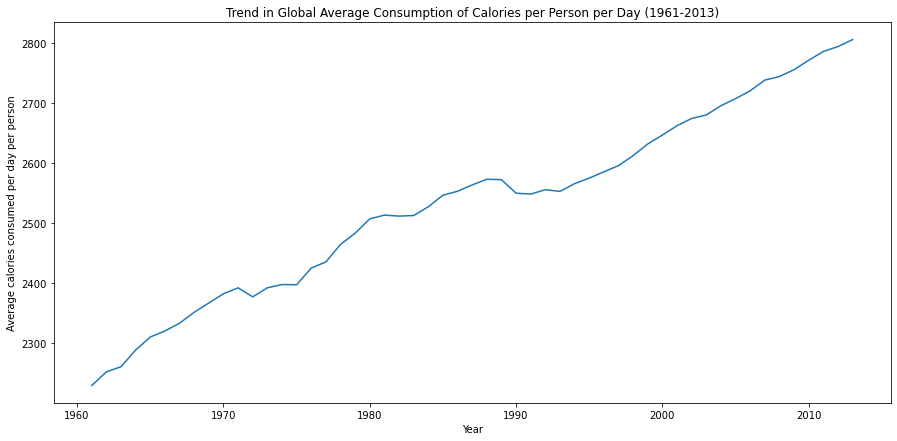

In [254]:
group_yr = df_partial.groupby(['year']).mean()
group_yr1 = group_yr.reset_index()
fig, ax1 = plt.subplots(figsize = (15, 7))

x = group_yr1['year']
y = group_yr1['foodsupply']

plt.plot(x, y)
plt.title('Trend in Global Average Consumption of Calories per Person per Day (1961-2013)')
plt.ylabel('Average calories consumed per day per person')
plt.xlabel('Year')

ax.yaxis.grid(color='gray', linestyle='dashed')

<a id='Q2'></a>
### Q2. How has the world's population changed over the same time period above?
Adding to the the visual above, the average calories consumed per person per day might be understood in relation to global population figures over the same time period. 

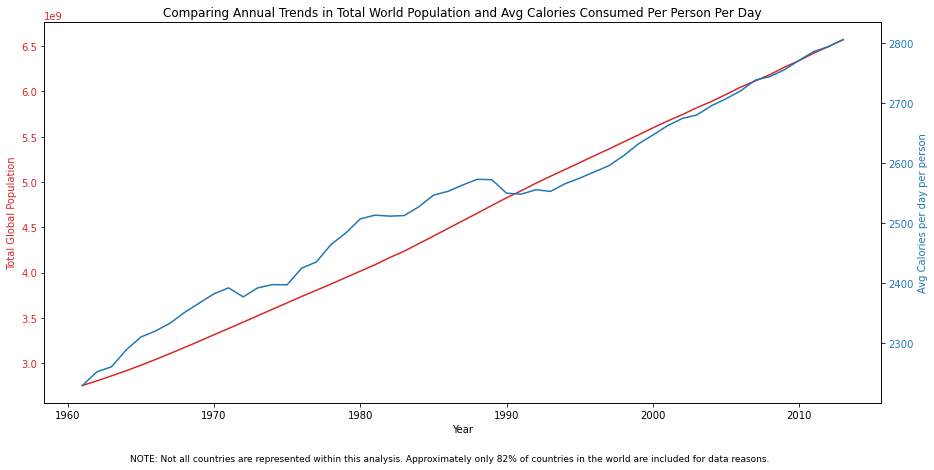

In [255]:
# https://matplotlib.org/gallery/api/two_scales.html

df_year_pop = df_partial.groupby('year', as_index=False).sum()
df_year_food = df_partial.groupby('year', as_index=False).mean()
    
# data to be plot
x = df_year_pop['year']
y_left = df_year_pop['population']
y_right = df_year_food['foodsupply']

fig, ax1 = plt.subplots(figsize = (15,7))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Global Population', color=color)
ax1.plot(x, y_left, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Avg Calories per day per person', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y_right, color=color)
ax2.tick_params(axis='y', labelcolor=color)
    
ax1.set_title("Comparing Annual Trends in Total World Population and Avg Calories Consumed Per Person Per Day")

txt="NOTE: Not all countries are represented within this analysis. Approximately only 82% of countries in the world are included for data reasons."
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=9)

    
plt.show()  # not necessary for Juypter notebooks
    


As global population has increased the average calories consumed per day, per person has increased as well. 

<a id='Q3'></a>
### Q3. Is food consumption related by region of the world?

In [256]:
df_full = pd.read_csv('df_full_clean.csv')

df_full.head(3)

,country,year,suicide,internet,population,foodsupply
0,Afghanistan,1990,703.0,0.0,12400000.0,2310.0
1,Afghanistan,1991,754.0,0.0,13300000.0,2040.0
2,Afghanistan,1992,820.0,0.0,14500000.0,1890.0


In [257]:
converter = coco.CountryConverter()

# requires a list as input
df_full['Continent'] = converter.convert(names = list(df_full.country.values), to = 'continent')

In [258]:
# check for missing values
df_full['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'America', 'Oceania'], dtype=object)

In [259]:
df_full.head(3)

,country,year,suicide,internet,population,foodsupply,Continent
0,Afghanistan,1990,703.0,0.0,12400000.0,2310.0,Asia
1,Afghanistan,1991,754.0,0.0,13300000.0,2040.0,Asia
2,Afghanistan,1992,820.0,0.0,14500000.0,1890.0,Asia


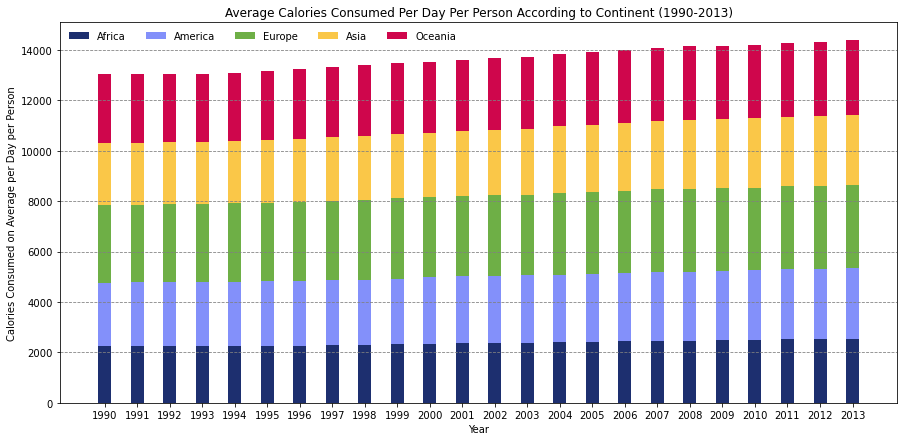

In [260]:
df_foodgrouped = df_full.groupby(['year', 'Continent'], as_index=False)['foodsupply'].mean()

# figure and axis
fig, ax = plt.subplots(1, figsize = (15, 7))

N = 24
africa_bar = df_foodgrouped.query('Continent == "Africa"')['foodsupply']
america_bar = df_foodgrouped.query('Continent == "America"')['foodsupply']
europe_bar = df_foodgrouped.query('Continent == "Europe"')['foodsupply']
asia_bar = df_foodgrouped.query('Continent == "Asia"')['foodsupply']
oceania_bar = df_foodgrouped.query('Continent == "Oceania"')['foodsupply']
ind = np.arange(N)   # x location group the groups
width = 0.40

p1 = plt.bar(ind, africa_bar, width, color='#1D2F6F')
p2 = plt.bar(ind, america_bar, width, bottom=africa_bar, color='#8390FA')
p3 = plt.bar(ind, europe_bar, width, bottom=np.array(africa_bar)+np.array(america_bar), color='#6EAF46')
p4 = plt.bar(ind, asia_bar, width, bottom=np.array(africa_bar)+np.array(america_bar)+np.array(europe_bar), color='#FAC748')
p5 = plt.bar(ind, oceania_bar, width, bottom=np.array(africa_bar)+np.array(america_bar)+np.array(europe_bar)+np.array(asia_bar), color='#CF064C')

plt.title('Average Calories Consumed Per Day Per Person According to Continent (1990-2013)')
plt.xlabel('Year')
plt.ylabel('Calories Consumed on Average per Day per Person')
ticks = df_foodgrouped.query('Continent == "America"')['year'].tolist()
plt.xticks(ind, ticks)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('Africa', 'America', 'Europe', 'Asia', 'Oceania'), ncol=5, frameon=False)

ax.yaxis.grid(color='gray', linestyle='dashed')

In [261]:
# confirm visual display properly
d1 = df_foodgrouped.query('Continent == "Africa" & year == "1990"')["foodsupply"]
d2 = df_foodgrouped.query('Continent == "America" & year == "1990"')["foodsupply"]
d3 = df_foodgrouped.query('Continent == "Europe" & year == "1990"')["foodsupply"]
d4 = df_foodgrouped.query('Continent == "Asia" & year == "1990"')["foodsupply"]
d5 = df_foodgrouped.query('Continent == "Oceania" & year == "1990"')["foodsupply"]

d1, d2, d3, d4, d5

(0    2237.5
 Name: foodsupply, dtype: float64,
 1    2510.0
 Name: foodsupply, dtype: float64,
 3    3079.030409
 Name: foodsupply, dtype: float64,
 2    2493.934524
 Name: foodsupply, dtype: float64,
 4    2712.857143
 Name: foodsupply, dtype: float64)

It appears that from the data qued from 1990 that the stacked bar is appearing correct in the chart. Comparing the different regions of the world (group according to continent) there is not a qualitive difference observed. Each region roughly indicates the same average Calorie consumption per person per day. 

<a id='Q4'></a>
### Q4.  Is there a relationship between the average consumption of calories per person per day in country with that country's  percentage of internet users?

This question will be answered looking at a possible trend over three years. The first, middle, and last year in the dataset will be examined. That will be 1990, 2002, and 2013, respectively. 

Examine the trend in numbers of global suicide and 

In [263]:
popsu = df_full.groupby(['year'], as_index=False).sum()
popsu.head()

,year,suicide,internet,population,foodsupply
0,1990,745052.75,5.03150,5.128804e+09,409133.253492
1,1991,762684.35,10.63203,5.207123e+09,409150.000000
2,1992,782975.20,18.38349,5.290329e+09,409950.000000
3,1993,808590.73,26.83423,5.367464e+09,409250.000000
4,1994,831746.46,52.40234,5.442119e+09,411410.000000


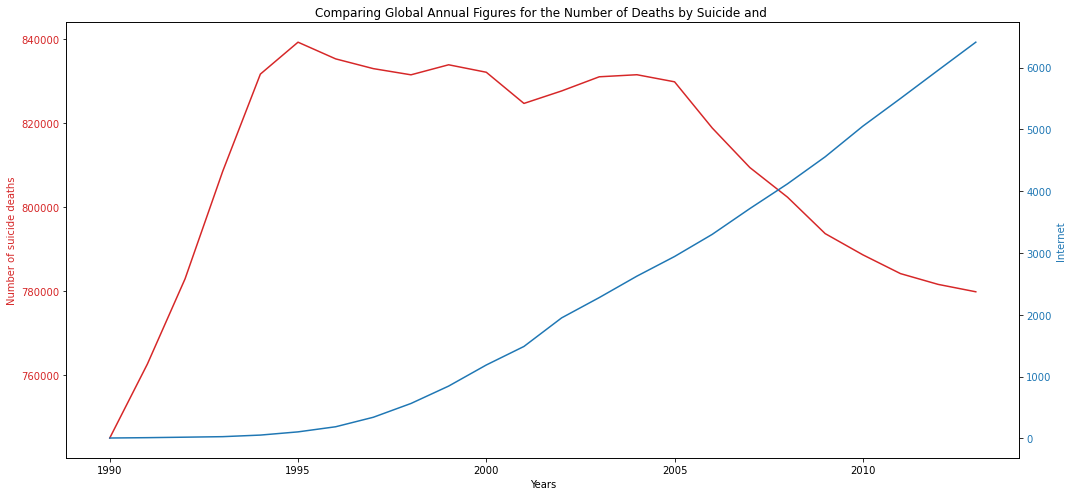

In [264]:
# data to be plot
x = popsu['year']
y_left = popsu['suicide']
y_right = popsu['internet']

fig, ax1 = plt.subplots(figsize = (15,7))

color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Number of suicide deaths', color=color)
ax1.plot(x, y_left, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Internet', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y_right, color=color)
ax2.tick_params(axis='y', labelcolor=color)
    
ax1.set_title("Comparing Global Annual Figures for the Number of Deaths by Suicide and ")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
plt.show()  # not necessary for Juypter notebooks

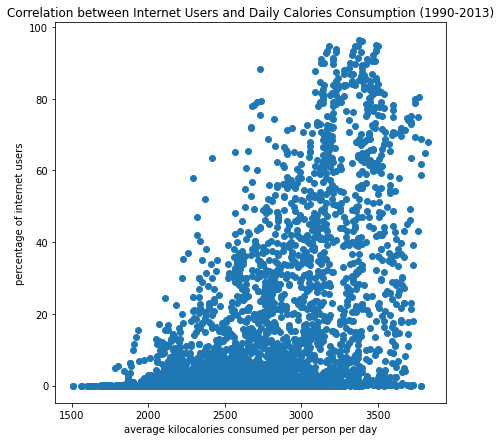

In [265]:
# plot avg calories per person per day and internet users of each country from 1990 to 2013.
plt.figure(figsize = (7,7))

x = df_full['foodsupply']
y = df_full['internet']

plt.scatter(x = x, y = y)
plt.title('Correlation between Internet Users and Daily Calories Consumption (1990-2013)')
plt.ylabel('percentage of internet users')
plt.xlabel('average kilocalories consumed per person per day');

In [266]:
cc1 = np.corrcoef(df_full['foodsupply'], df_full['internet'])[0,1]
cc1

0.536908324590216

Each data point above repsents that statistics from one country for a specific year. Since 1990 may be early for less developed nations the plot above just uses data from 2013. 

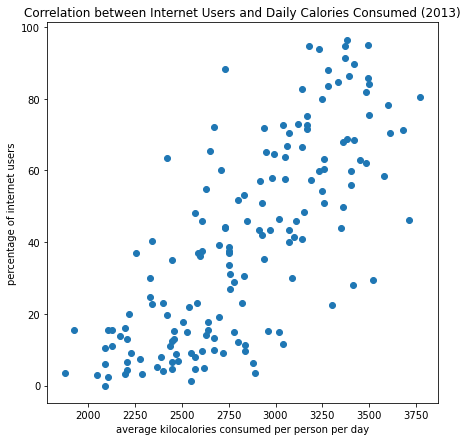

In [267]:
# plot avg calories per person per day and internet users of each country from 1990 to 2013.
plt.figure(figsize = (7,7))

filter13 = df_full.query('year == "2013"')
x = filter13['foodsupply']
y = filter13['internet']

plt.scatter(x = x, y = y)
plt.title('Correlation between Internet Users and Daily Calories Consumed (2013)')
plt.ylabel('percentage of internet users')
plt.xlabel('average kilocalories consumed per person per day');

In [268]:
cc2 = np.corrcoef(filter13['foodsupply'], filter13['internet'])[0,1]
cc2

0.7510562554866376

In order to make appropriate comparison with the number of deaths due to sucide, this figure in the dataframe is a count per year. Similar to the internet users, this figure will be reported as a percentages based on the country's population. 

In [269]:
# create percent_suicide column
df_full['percent_suicide'] = (df_full['suicide'] / df_full['population']) * 100

# confirm new column
df_full.head()

,country,year,suicide,internet,population,foodsupply,Continent,percent_suicide
0,Afghanistan,1990,703.0,0.0,12400000.0,2310.0,Asia,0.005669
1,Afghanistan,1991,754.0,0.0,13300000.0,2040.0,Asia,0.005669
2,Afghanistan,1992,820.0,0.0,14500000.0,1890.0,Asia,0.005655
3,Afghanistan,1993,894.0,0.0,15800000.0,1910.0,Asia,0.005658
4,Afghanistan,1994,977.0,0.0,17100000.0,1820.0,Asia,0.005713


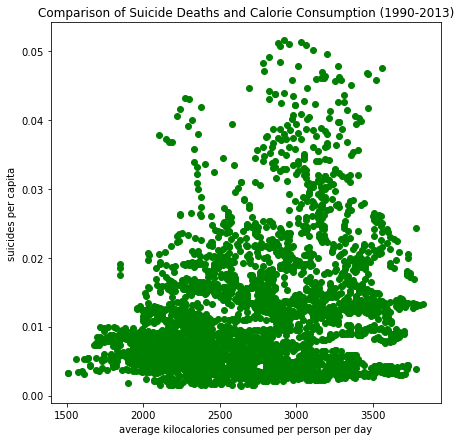

In [270]:
# plot avg calories per person per day and number of suicides per capita of each country from 1990 to 2013.
plt.figure(figsize = (7,7))

x = df_full['foodsupply']
y2 = df_full['percent_suicide']

plt.scatter(x = x, y = y2, c = 'green')
plt.title('Comparison of Suicide Deaths and Calorie Consumption (1990-2013)')
plt.ylabel('suicides per capita')
plt.xlabel('average kilocalories consumed per person per day');


<a id='summary'></a>
## Summary & Conclusions

### General
As population has steadily increased every subquent year from 1961 to 2013, so has the average number of calories consumed per day per person. This appears not to have any specific influence on a particular region (continent) of the world, rather a universal increase. 

### Mental Health & Technology Relationships
Athough not strong, there is a postive trend in the Calories consumed per person per day and percentage of internet users. Among the years of 1990-2013 there is a 0.53 correlation coefficent. If the data from 2013, the latest year, is only observed, the correlation coefficent increases to 0.75, indicating a stronger correlation. This eliminates many data points where the percentage of users in a country is zero or close to zero.  

### Limitiations
Due to limitations of available data only about 80% of the countries are represented in the analysis. The countries not included tend to be smaller nations (in terms of population) and does not seem to heavily identify with one region, by general inspection. 

<a id='appendix'></a>
## Appendix

The following are some studies that 

Food Consumption and Mental Health:
1. [*Overeating Among Adolescents: Prevalence and Associations With Weight-Related Characteristics and Psychological Health.*](https://pediatrics.aappublications.org/content/111/1/67.short) Diann M. Ackard, Dianne Neumark-Sztainer, Mary Story, Cheryl Perry. *Pediatrics* Jan 2003, 111 (1) 67-74; DOI: 10.1542/peds.111.1.67

2. J. M. Mond, P. J. Hay, B. Rodgers & C. Owen (2011) [Mental health impairment associated with eating-disorder features in a community sample of women](https://www.tandfonline.com/doi/citedby/10.3109/09638237.2011.577112?scroll=top&needAccess=true), Journal of Mental Health, 20:5, 445-455, DOI: 10.3109/09638237.2011.577112

3. Polivy, J., & Herman, C. (2005). Mental Health and Eating Behaviours: A Bi-directional Relation. Canadian Journal of Public Health / Revue Canadienne De Sante'e Publique, 96, S43-S46. Retrieved January 31, 2021, from http://www.jstor.org/stable/41994472


Food Consumption and Technology:
1. Darius Lakdawalla, Tomas Philipson,
The growth of obesity and technological change,
Economics & Human Biology,
Volume 7, Issue 3,
2009,
Pages 283-293,
ISSN 1570-677X,
https://doi.org/10.1016/j.ehb.2009.08.001.
(http://www.sciencedirect.com/science/article/pii/S1570677X09000720)

2. Mohadeseh Aghasi, Ahmadreza Matinfar, Mahdieh Golzarand, Asma Salari-Moghaddam, Soraiya Ebrahimpour-Koujan, Internet Use in Relation to Overweight and Obesity: A Systematic Review and Meta-Analysis of Cross-Sectional Studies, Advances in Nutrition, Volume 11, Issue 2, March 2020, Pages 349–356, https://doi.org/10.1093/advances/nmz073

3. L.D. Rosen, A.F. Lim, J. Felt, L.M. Carrier, N.A. Cheever, J.M. Lara-Ruiz, J.S. Mendoza, J. Rokkum,
Media and technology use predicts ill-being among children, preteens and teenagers independent of the negative health impacts of exercise and eating habits,
Computers in Human Behavior,
Volume 35,
2014,
Pages 364-375,
ISSN 0747-5632,
https://doi.org/10.1016/j.chb.2014.01.036.
(http://www.sciencedirect.com/science/article/pii/S074756321400048X)
